In [1]:
import tensorflow as tf
from scipy import misc
import matplotlib.pyplot as plt

In [8]:
# tf.train.string_input_producer or tf.FIFOQueue
# https://www.tensorflow.org/programmers_guide/threading_and_queues

help(tf.FIFOQueue.__init__)

q = tf.FIFOQueue(capacity = 3, dtypes = "float")
init = q.enqueue_many(([0., 0., 0.],))
x = q.dequeue()
y = x + 1
q_inc = q.enqueue([y])

with tf.Session() as sess:
    sess.run(init)
    sess.run(q_inc)
    sess.run(q_inc)
    sess.run(q_inc)

Help on function __init__ in module tensorflow.python.ops.data_flow_ops:

__init__(self, capacity, dtypes, shapes=None, names=None, shared_name=None, name='fifo_queue')
    Creates a queue that dequeues elements in a first-in first-out order.
    
    A `FIFOQueue` has bounded capacity; supports multiple concurrent
    producers and consumers; and provides exactly-once delivery.
    
    A `FIFOQueue` holds a list of up to `capacity` elements. Each
    element is a fixed-length tuple of tensors whose dtypes are
    described by `dtypes`, and whose shapes are optionally described
    by the `shapes` argument.
    
    If the `shapes` argument is specified, each component of a queue
    element must have the respective fixed shape. If it is
    unspecified, different queue elements may have different shapes,
    but the use of `dequeue_many` is disallowed.
    
    Args:
      capacity: An integer. The upper bound on the number of elements
        that may be stored in this queue.
      

In [3]:
# tf.decode_raw

help(tf.decode_raw)

value = tf.constant(['0', '1', '2'])
g = tf.decode_raw(value, tf.uint8)
with tf.Session() as sess:
    a = sess.run(g)
a

Help on function decode_raw in module tensorflow.python.ops.gen_parsing_ops:

decode_raw(bytes, out_type, little_endian=None, name=None)
    Reinterpret the bytes of a string as a vector of numbers.
    
    Args:
      bytes: A `Tensor` of type `string`.
        All the elements must have the same length.
      out_type: A `tf.DType` from: `tf.half, tf.float32, tf.float64, tf.int32, tf.uint8, tf.int16, tf.int8, tf.int64`.
      little_endian: An optional `bool`. Defaults to `True`.
        Whether the input `bytes` are in little-endian order.
        Ignored for `out_type` values that are stored in a single byte like
        `uint8`.
      name: A name for the operation (optional).
    
    Returns:
      A `Tensor` of type `out_type`.
      A Tensor with one more dimension than the input `bytes`.  The
      added dimension will have size equal to the length of the elements
      of `bytes` divided by the number of bytes to represent `out_type`.



array([[48],
       [49],
       [50]], dtype=uint8)

In [9]:
# tf.slice

help(tf.slice)

x = tf.constant([
    [[1,1,1], [2,2,2]],
    [[3,3,3], [4,4,4]],
    [[5,5,5], [6,6,6]]
], dtype=tf.int32)

y = tf.slice(x, begin=[1,0,0], size=[1,1,3])
z = tf.slice(x, begin=[1,0,0], size=[1,2,3])
w = tf.slice(x, begin=[1,0,0], size=[2,1,3])

with tf.Session() as sess:
    print(sess.run(y))
    print(sess.run(z))
    print(sess.run(w))

Help on function slice in module tensorflow.python.ops.array_ops:

slice(input_, begin, size, name=None)
    Extracts a slice from a tensor.
    
    This operation extracts a slice of size `size` from a tensor `input` starting
    at the location specified by `begin`. The slice `size` is represented as a
    tensor shape, where `size[i]` is the number of elements of the 'i'th dimension
    of `input` that you want to slice. The starting location (`begin`) for the
    slice is represented as an offset in each dimension of `input`. In other
    words, `begin[i]` is the offset into the 'i'th dimension of `input` that you
    want to slice from.
    
    `begin` is zero-based; `size` is one-based. If `size[i]` is -1,
    all remaining elements in dimension i are included in the
    slice. In other words, this is equivalent to setting:
    
    `size[i] = input.dim_size(i) - begin[i]`
    
    This operation requires that:
    
    `0 <= begin[i] <= begin[i] + size[i] <= Di  for i in [0, n

Help on function resize_image_with_crop_or_pad in module tensorflow.python.ops.image_ops_impl:

resize_image_with_crop_or_pad(image, target_height, target_width)
    Crops and/or pads an image to a target width and height.
    
    Resizes an image to a target width and height by either centrally
    cropping the image or padding it evenly with zeros.
    
    If `width` or `height` is greater than the specified `target_width` or
    `target_height` respectively, this op centrally crops along that dimension.
    If `width` or `height` is smaller than the specified `target_width` or
    `target_height` respectively, this op centrally pads with 0 along that
    dimension.
    
    Args:
      image: 3-D tensor of shape `[height, width, channels]`
      target_height: Target height.
      target_width: Target width.
    
    Raises:
      ValueError: if `target_height` or `target_width` are zero or negative.
    
    Returns:
      Cropped and/or padded image of shape
      `[target_heigh

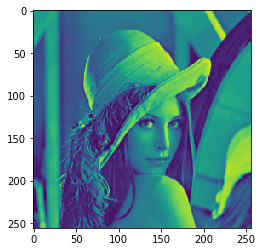

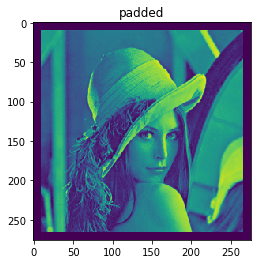

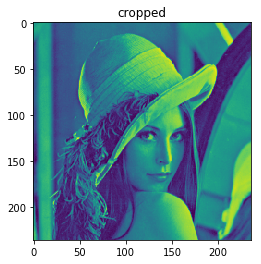

In [17]:
# tf.image.resize_image_with_crop_or_pad

help(tf.image.resize_image_with_crop_or_pad)

lena = misc.imread('lena1.tif')
plt.imshow(lena)
plt.show()

d = 20
x, y = lena.shape
padded = tf.image.resize_image_with_crop_or_pad(lena.reshape((x, y, 1)), x + d, y + d)
cropped = tf.image.resize_image_with_crop_or_pad(lena.reshape((x, y, 1)), x - d, y - d)

with tf.Session() as sess:
    a = sess.run(padded)
    b = sess.run(cropped)
    plt.title('padded')
    plt.imshow(a.reshape((x + d, y + d)))
    plt.show()
    plt.title('cropped')
    plt.imshow(b.reshape((x - d, y - d)))
    plt.show()

Help on function random_crop in module tensorflow.python.ops.random_ops:

random_crop(value, size, seed=None, name=None)
    Randomly crops a tensor to a given size.
    
    Slices a shape `size` portion out of `value` at a uniformly chosen offset.
    Requires `value.shape >= size`.
    
    If a dimension should not be cropped, pass the full size of that dimension.
    For example, RGB images can be cropped with
    `size = [crop_height, crop_width, 3]`.
    
    Args:
      value: Input tensor to crop.
      size: 1-D tensor with size the rank of `value`.
      seed: Python integer. Used to create a random seed. See
        [`set_random_seed`](../../api_docs/python/constant_op.md#set_random_seed)
        for behavior.
      name: A name for this operation (optional).
    
    Returns:
      A cropped tensor of the same rank as `value` and shape `size`.

(206, 206, 1)


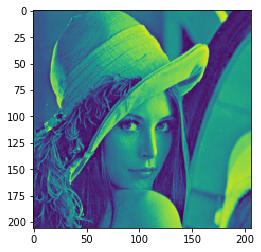

In [35]:
# tf.random_crop

help(tf.random_crop)

d = 50
g = tf.random_crop(lena.reshape((x,y,1)), [x - d, y - d, 1])

with tf.Session() as sess:
    a = sess.run(g)
    print(a.shape)
    plt.imshow(a.reshape((a.shape[0], a.shape[1])))
    plt.show()

Help on function random_flip_left_right in module tensorflow.python.ops.image_ops_impl:

random_flip_left_right(image, seed=None)
    Randomly flip an image horizontally (left to right).
    
    With a 1 in 2 chance, outputs the contents of `image` flipped along the
    second dimension, which is `width`.  Otherwise output the image as-is.
    
    Args:
      image: A 3-D tensor of shape `[height, width, channels].`
      seed: A Python integer. Used to create a random seed. See
        [`set_random_seed`](../../api_docs/python/constant_op.md#set_random_seed)
        for behavior.
    
    Returns:
      A 3-D tensor of the same type and shape as `image`.
    
    Raises:
      ValueError: if the shape of `image` not supported.



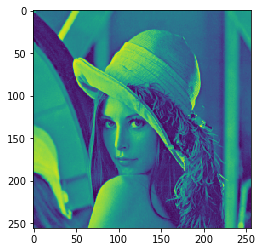

In [38]:
# tf.image.random_flip_left_right

help(tf.image.random_flip_left_right)

g = tf.image.random_flip_left_right(lena.reshape((x, y, 1)))

with tf.Session() as sess:
    a = sess.run(g)
    plt.imshow(a.reshape((x, y)))
    plt.show()

Help on function per_image_standardization in module tensorflow.python.ops.image_ops_impl:

per_image_standardization(image)
    Linearly scales `image` to have zero mean and unit norm.
    
    This op computes `(x - mean) / adjusted_stddev`, where `mean` is the average
    of all values in image, and
    `adjusted_stddev = max(stddev, 1.0/sqrt(image.NumElements()))`.
    
    `stddev` is the standard deviation of all values in `image`. It is capped
    away from zero to protect against division by 0 when handling uniform images.
    
    Args:
      image: 3-D tensor of shape `[height, width, channels]`.
    
    Returns:
      The standardized image with same shape as `image`.
    
    Raises:
      ValueError: if the shape of 'image' is incompatible with this function.



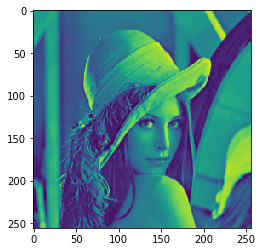

In [39]:
# tf.image.per_image_standardization

help(tf.image.per_image_standardization)

g = tf.image.per_image_standardization(lena.reshape((x,y,1)))

with tf.Session() as sess:
    a = sess.run(g)
    plt.imshow(a.reshape(x, y))
    plt.show()

In [2]:
# tf.RandomShuffleQueue

help(tf.RandomShuffleQueue)

q = tf.RandomShuffleQueue(
    capacity = 3,
    min_after_dequeue = 1,
    dtypes = [tf.float32]
)

init = q.enqueue_many(([0., 0., 0.],))
x = q.dequeue()
y = x + 1
q_inc = q.enqueue([y])

with tf.Session() as sess:
    sess.run(init)
    sess.run(q_inc)
    sess.run(q_inc)
    sess.run(q_inc)

Help on class RandomShuffleQueue in module tensorflow.python.ops.data_flow_ops:

class RandomShuffleQueue(QueueBase)
 |  A queue implementation that dequeues elements in a random order.
 |  
 |  See [`tf.QueueBase`](#QueueBase) for a description of the methods on
 |  this class.
 |  
 |  @@__init__
 |  
 |  Method resolution order:
 |      RandomShuffleQueue
 |      QueueBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, capacity, min_after_dequeue, dtypes, shapes=None, names=None, seed=None, shared_name=None, name='random_shuffle_queue')
 |      Create a queue that dequeues elements in a random order.
 |      
 |      A `RandomShuffleQueue` has bounded capacity; supports multiple
 |      concurrent producers and consumers; and provides exactly-once
 |      delivery.
 |      
 |      A `RandomShuffleQueue` holds a list of up to `capacity`
 |      elements. Each element is a fixed-length tuple of tensors whose
 |      dtypes are described by `dtypes`, an